In [5]:
library(tidyverse)
library(vroom)
library(scales)
library(viridis)
library(RColorBrewer)

In [6]:
options(jupyter.plot_scale=1) 

In [7]:
dat = vroom(Sys.glob("heritability_simulation_output/output_*.log"),id="filename") %>%
    extract(filename,into=c("env","replicate"),regex=c("output_(-?[0-9]*)_([0-9]*)\\.log")) %>%
    type_convert()

Rows: 501000 Columns: 17
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (16): cycle, Zbar1, Gbar1, VP1, VG1, h21, Zbar2, Gbar2, VP2, VG2, h22, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  env = col_double(),
  replicate = col_double()
)



`summarise()` has grouped output by 'env'. You can override using the `.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Saving 7 x 7 in image


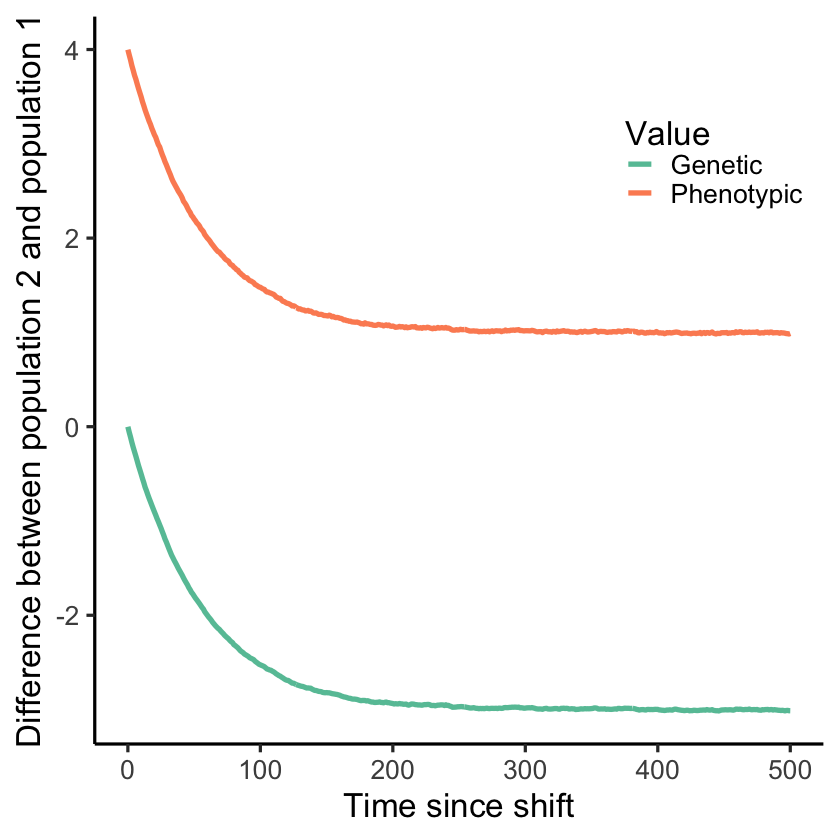

In [8]:
dat %>% 
    select(cycle,env,Zbar1,Zbar2,Gbar1,Gbar2) %>% 
    group_by(env,cycle) %>%
    summarise(G = mean(Gbar2-Gbar1), P = mean(Zbar2-Zbar1)) %>%
    pivot_longer(G:P, names_to="variable",values_to="difference") %>%
    mutate(environment_direction = ifelse(env==-2,"Discordant","Concordant")) %>% 
    mutate(variable = ifelse(variable=="G", "Genetic", "Phenotypic")) %>%
    mutate(cycle = cycle-20000) %>%
    filter(environment_direction=="Concordant") %>%
    ggplot(aes(cycle,difference)) + 
    geom_line(aes(color=variable),size=1.5) +
    theme_classic(base_size=20) +
    theme(legend.position=c(.85,.8),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set2",name="Value") +
    scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") +
    ylab("Difference between population 2 and population 1")

ggsave("Figs/delta_concordant.pdf")

`summarise()` has grouped output by 'env'. You can override using the `.groups` argument.
Saving 7 x 7 in image


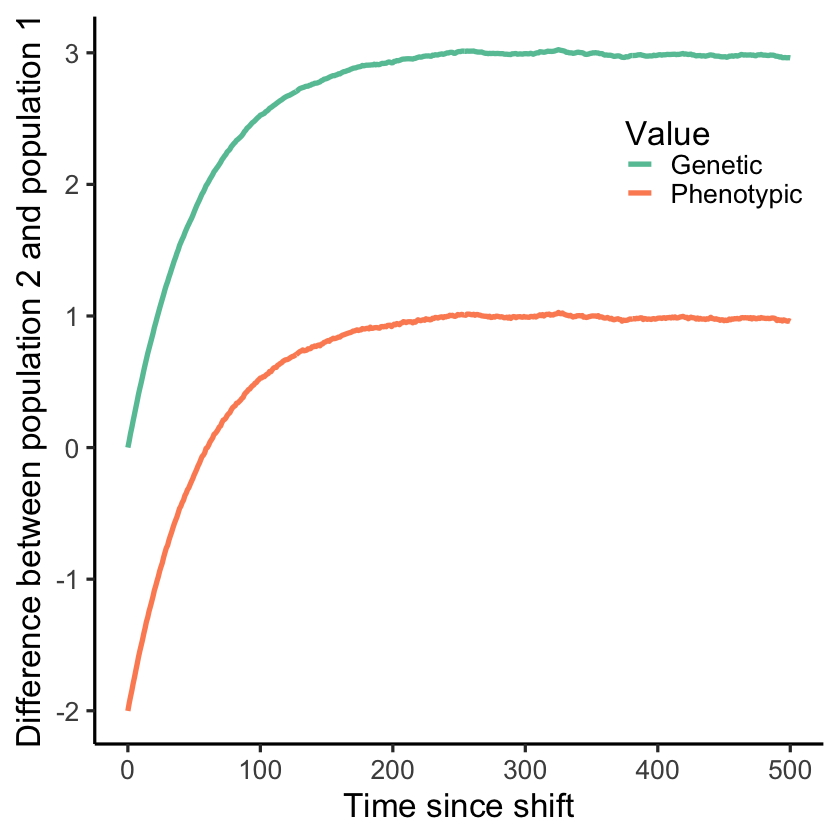

In [9]:
dat %>% 
    select(cycle,env,Zbar1,Zbar2,Gbar1,Gbar2) %>% 
    group_by(env,cycle) %>%
    summarise(G = mean(Gbar2-Gbar1), P = mean(Zbar2-Zbar1)) %>%
    pivot_longer(G:P, names_to="variable",values_to="difference") %>%
    mutate(environment_direction = ifelse(env==-2,"Discordant","Concordant")) %>% 
    filter(environment_direction=="Discordant") %>% 
    mutate(variable = ifelse(variable=="G", "Genetic", "Phenotypic")) %>%
    mutate(cycle = cycle-20000) %>%
    ggplot(aes(cycle,difference)) + 
    geom_line(aes(color=variable),size=1.5) +
    theme_classic(base_size=20) +
    theme(legend.position=c(.85,.8),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set2",name="Value") +
    # scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") +
    ylab("Difference between population 2 and population 1")

ggsave("Figs/delta_discordant.pdf")

`summarise()` has grouped output by 'env'. You can override using the `.groups` argument.
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.”
Saving 7 x 7 in image


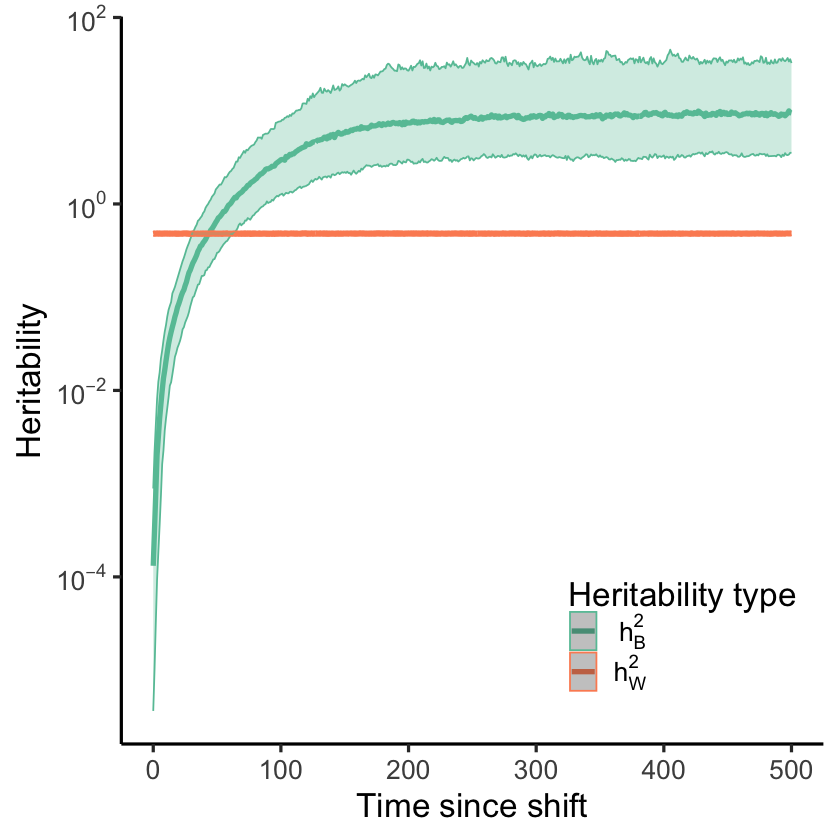

In [10]:
#This uses median
dat %>% 
    select(cycle,env,h2b,h2w) %>% 
    group_by(env,cycle) %>%
    summarise(h2b_q50=median(h2b),h2w_q50=median(h2w), h2b_q10=quantile(h2b,.1), h2b_q90 = quantile(h2b,.9), h2w_q10 = quantile(h2w,.1), h2w_q90 = quantile(h2w,.9)) %>%
    pivot_longer(h2b_q50:h2w_q90,names_pattern="(.+)_(.+)", names_to=c("variable","quantile"),values_to="value") %>%
    pivot_wider(names_from=quantile,values_from=value) %>%
    mutate(environment_direction = ifelse(env==-2,"Discordant","Concordant")) %>% 
    mutate(cycle = cycle-20000) %>%
    filter(environment_direction=="Concordant") %>%
    ggplot(aes(cycle,q50)) + 
    geom_line(aes(color=variable), size=1.5) +
    geom_ribbon(aes(color=variable,fill=variable,ymin=q10,ymax=q90),alpha=.3) + 
    scale_y_log10("Heritability",labels=label_log()) +
    theme_classic(base_size=20) +
    theme(legend.position=c(.8,.15),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set2",name="Heritability type",labels=c(expression(h[B]^2),expression(h[W]^2))) +
    scale_fill_brewer("",palette="Set2") + 
    guides(fill=FALSE) + 
    # scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") 

ggsave("Figs/h2_concordant.pdf")

`summarise()` has grouped output by 'env'. You can override using the `.groups` argument.
Saving 7 x 7 in image


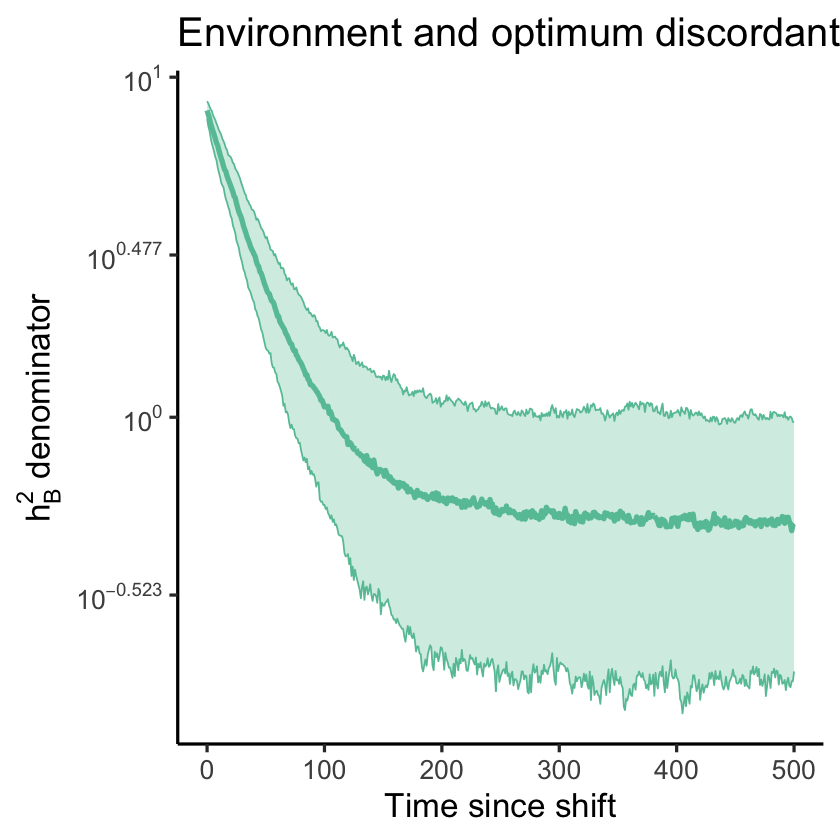

In [11]:
#h2b denominator
dat %>% 
    select(cycle,env,h2b_denom) %>% 
    group_by(env,cycle) %>%
    summarise(h2b_q50=median(h2b_denom), h2b_q10=quantile(h2b_denom,.1), h2b_q90 = quantile(h2b_denom,.9)) %>%
    pivot_longer(h2b_q50:h2b_q90,names_pattern="(.+)_(.+)", names_to=c("variable","quantile"),values_to="value") %>%
    pivot_wider(names_from=quantile,values_from=value) %>%
    mutate(environment_direction = ifelse(env==-2,"Discordant","Concordant")) %>% 
    mutate(cycle = cycle-20000) %>%
    filter(environment_direction=="Concordant") %>%
    ggplot(aes(cycle,q50)) + 
    geom_line(aes(color=variable), size=1.5) +
    geom_ribbon(aes(color=variable,fill=variable,ymin=q10,ymax=q90),alpha=.3) + 
    scale_y_log10(expression(h[B]^2*' denominator') ,labels=label_log()) +
    theme_classic(base_size=20) +
    theme(legend.position=c(.8,.85),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set2",name="Heritability type",labels=c(expression(h[B]^2),expression(h[W]^2))) +
    scale_fill_brewer("",palette="Set2") + 
    ggtitle("Environment and optimum discordant") +
    xlab("Time since shift") +
    guides(fill=FALSE,color=FALSE)

ggsave("Figs/h2b_denom_concordant.pdf")

`summarise()` has grouped output by 'env'. You can override using the `.groups` argument.
Saving 7 x 7 in image


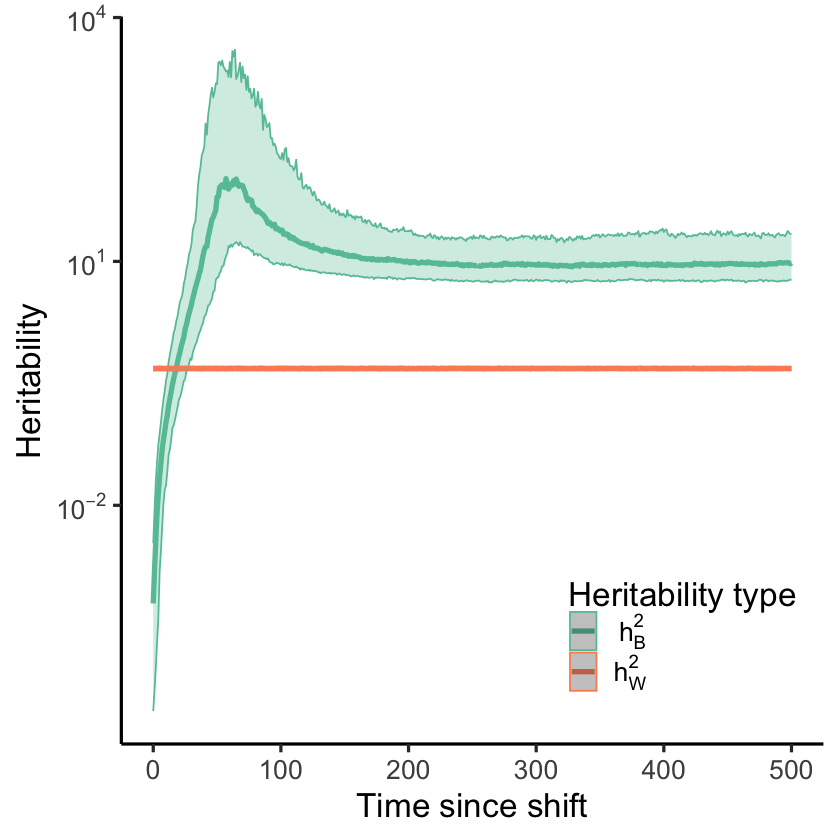

In [12]:
dat %>% 
    select(cycle,env,h2b,h2w) %>% 
    group_by(env,cycle) %>%
    summarise(h2b_q50=median(h2b),h2w_q50=median(h2w), h2b_q10=quantile(h2b,.1), h2b_q90 = quantile(h2b,.9), h2w_q10 = quantile(h2w,.1), h2w_q90 = quantile(h2w,.9)) %>%
    pivot_longer(h2b_q50:h2w_q90,names_pattern="(.+)_(.+)", names_to=c("variable","quantile"),values_to="value") %>%
    pivot_wider(names_from=quantile,values_from=value) %>%
    mutate(environment_direction = ifelse(env==4,"Discordant","Concordant")) %>% 
    mutate(cycle = cycle-20000) %>%
    filter(environment_direction=="Concordant") %>%
    ggplot(aes(cycle,q50)) + 
    geom_line(aes(color=variable), size=1.5) +
    geom_ribbon(aes(color=variable,fill=variable,ymin=q10,ymax=q90),alpha=.3) + 
    scale_y_log10("Heritability",labels=label_log()) +
    theme_classic(base_size=20) +
    theme(legend.position=c(.8,.15),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set2",name="Heritability type",labels=c(expression(h[B]^2),expression(h[W]^2))) +
    scale_fill_brewer("",palette="Set2") + 
    # scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") +
    guides(fill=FALSE)

ggsave("Figs/h2_discordant.pdf")

`summarise()` has grouped output by 'env'. You can override using the `.groups` argument.
Saving 7 x 7 in image


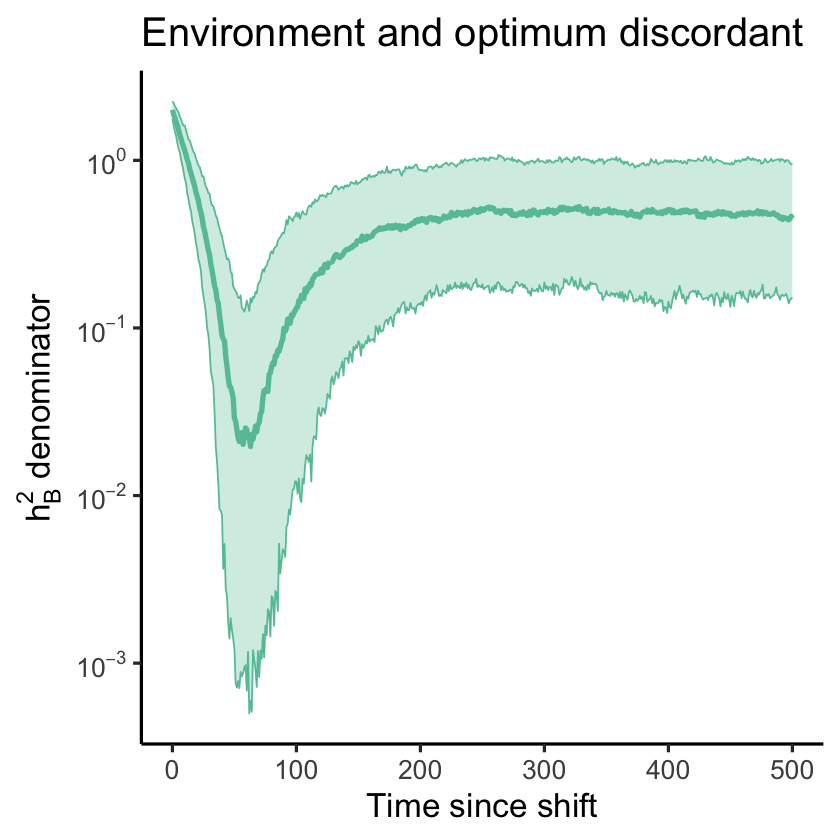

In [13]:
#h2b denominator
dat %>% 
    select(cycle,env,h2b_denom) %>% 
    group_by(env,cycle) %>%
    summarise(h2b_q50=median(h2b_denom), h2b_q10=quantile(h2b_denom,.1), h2b_q90 = quantile(h2b_denom,.9)) %>%
    pivot_longer(h2b_q50:h2b_q90,names_pattern="(.+)_(.+)", names_to=c("variable","quantile"),values_to="value") %>%
    pivot_wider(names_from=quantile,values_from=value) %>%
    mutate(environment_direction = ifelse(env==-2,"Discordant","Concordant")) %>% 
    mutate(cycle = cycle-20000) %>%
    filter(environment_direction=="Discordant") %>%
    ggplot(aes(cycle,q50)) + 
    geom_line(aes(color=variable), size=1.5) +
    geom_ribbon(aes(color=variable,fill=variable,ymin=q10,ymax=q90),alpha=.3) + 
    scale_y_log10(expression(h[B]^2*' denominator') ,labels=label_log()) +
    theme_classic(base_size=20) +
    theme(legend.position=c(.8,.15),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set2",name="Heritability type",labels=c(expression(h[B]^2),expression(h[W]^2))) +
    scale_fill_brewer("",palette="Set2") + 
    xlab("Time since shift") +
    ggtitle("Environment and optimum discordant") +
    guides(color=FALSE,fill=FALSE)

ggsave("Figs/h2b_denom_discordant.pdf")

Warning message:
“There were 3006 warnings in `summarise()`.
The first warning was:
ℹ In argument: `source = (structure(function (..., .x = ..1, .y = ..2, . = ..1) ...`.
ℹ In group 1: `c = "0.01"`, `cycle = 20000`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3005 remaining warnings.”
Saving 7 x 7 in image


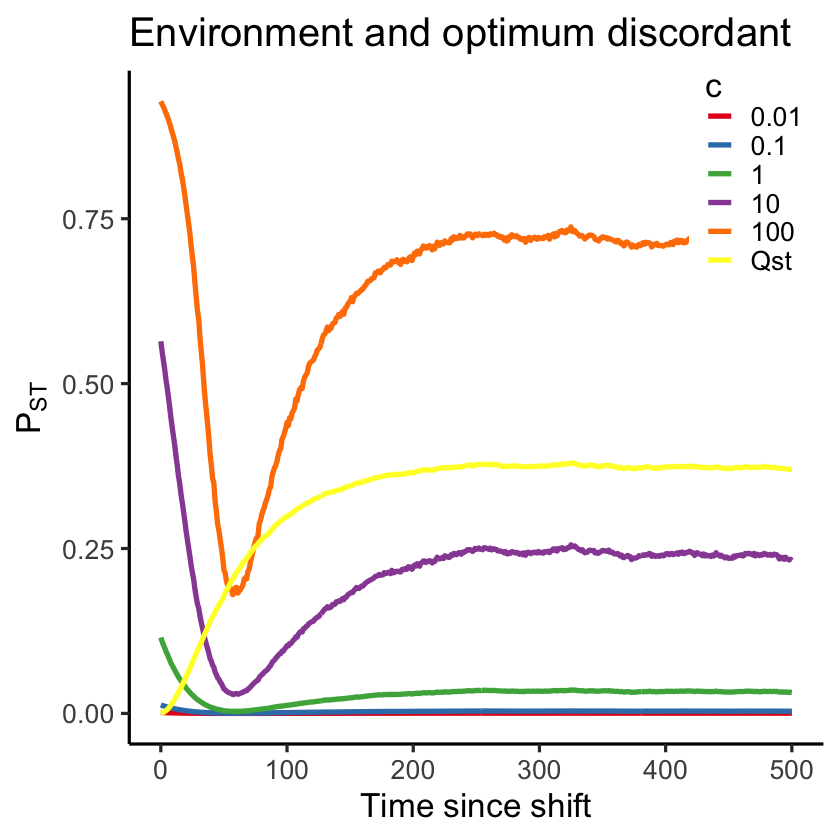

In [14]:
dat %>% 
    filter(env==-2) %>% 
    select(cycle,Zbar1,Zbar2,VP1,VP2,VG1,VG2,Qst,h2b,h2w,h21,h22) %>% 
    mutate(c = list(exp(seq(log(1e-2),log(100),len=5)))) %>%
    unnest(c) %>%
    rowwise() %>% 
    mutate(Pst = c*1/2*var(c(Zbar1,Zbar2))/(c*1/2*var(c(Zbar1,Zbar2))+(VP1+VP2))) %>%
    select(cycle,c,Qst,Pst) %>%
    pivot_longer(Qst:Pst,names_to="source",values_to="statistic") %>%
    mutate(c = ifelse(source=="Qst","Qst",c)) %>%
    group_by(c,cycle) %>%
    summarise_all(~mean(.)) %>%
    mutate(cycle = cycle-20000) %>%
    ggplot(aes(cycle,statistic)) +
    geom_line(aes(color=c),size=1.5) + 
    theme_classic(base_size=20) +
    theme(legend.position=c(.9,.85),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set1",name="c") +
    scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") +
    ylab(expression(P[ST])) +
    ggtitle("Environment and optimum discordant")

ggsave("Figs/Qst_different.pdf")

Warning message:
“There were 3006 warnings in `summarise()`.
The first warning was:
ℹ In argument: `source = (structure(function (..., .x = ..1, .y = ..2, . = ..1) ...`.
ℹ In group 1: `c = "0.01"`, `cycle = 20000`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3005 remaining warnings.”
Saving 7 x 7 in image


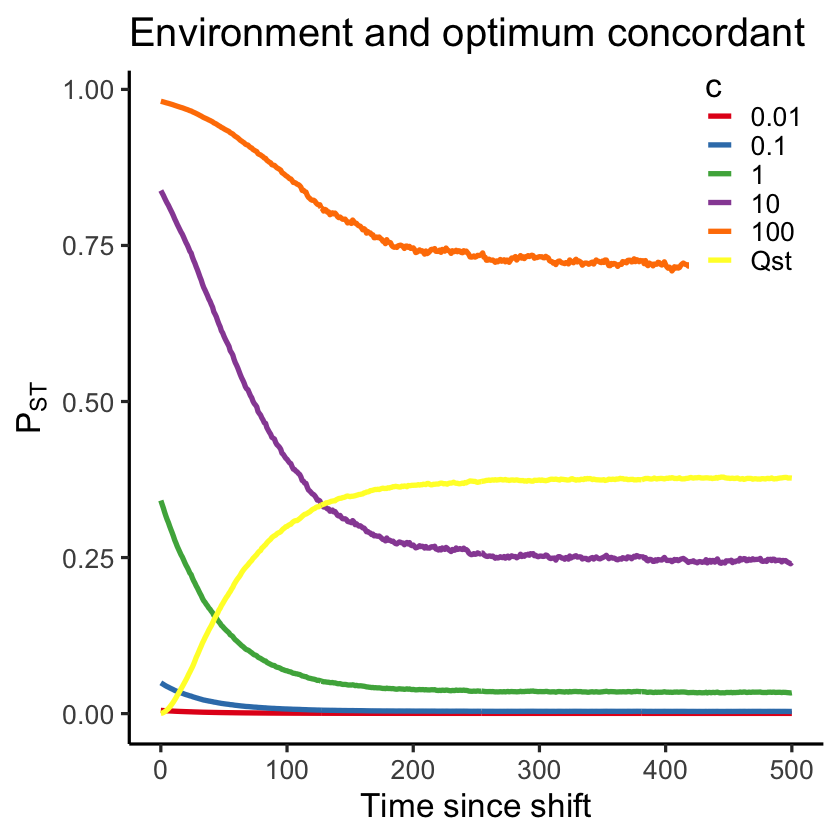

In [15]:
dat %>% 
    filter(env==4) %>% 
    select(cycle,Zbar1,Zbar2,VP1,VP2,VG1,VG2,Qst,h2b,h2w,h21,h22) %>% 
    mutate(c = list(exp(seq(log(1e-2),log(100),len=5)))) %>%
    unnest(c) %>%
    rowwise() %>% 
    mutate(Pst = c*1/2*var(c(Zbar1,Zbar2))/(c*1/2*var(c(Zbar1,Zbar2))+(VP1+VP2))) %>%
    select(cycle,c,Qst,Pst) %>%
    pivot_longer(Qst:Pst,names_to="source",values_to="statistic") %>%
    mutate(c = ifelse(source=="Qst","Qst",c)) %>%
    group_by(c,cycle) %>%
    summarise_all(~mean(.)) %>%
    mutate(cycle = cycle-20000) %>%
    ggplot(aes(cycle,statistic)) +
    geom_line(aes(color=c),size=1.5) + 
    theme_classic(base_size=20) +
    theme(legend.position=c(.9,.85),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set1",name="c") +
    scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") +
    ylab(expression(P[ST])) +
    ggtitle("Environment and optimum concordant")

ggsave("Figs/Qst_same.pdf")

`summarise()` has grouped output by 'c'. You can override using the `.groups` argument.
Saving 7 x 7 in image


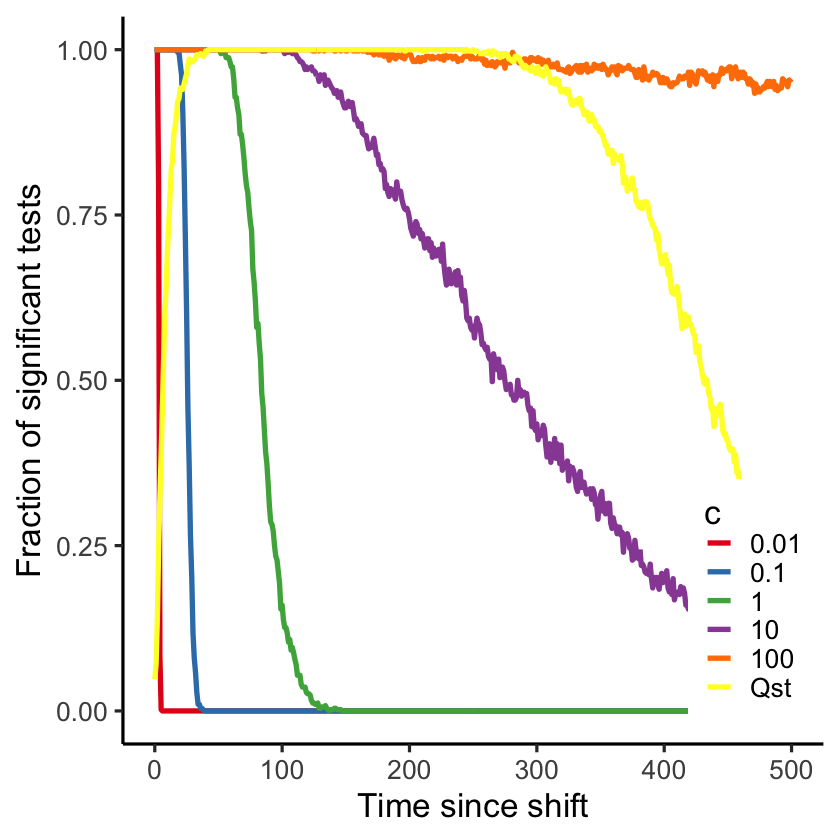

In [16]:
dat %>% 
    filter(env==4) %>% 
    select(cycle,Zbar1,Zbar2,VP1,VP2,VG1,VG2,Qst,h2b,h2w,h21,h22,Fst) %>% 
    mutate(c = list(exp(seq(log(1e-2),log(100),len=5)))) %>%
    unnest(c) %>%
    rowwise() %>% 
    mutate(Pst = c*1/2*var(c(Zbar1,Zbar2))/(c*1/2*var(c(Zbar1,Zbar2))+(VP1+VP2))) %>%
    select(cycle,c,Qst,Pst,Fst) %>%
    pivot_longer(Qst:Pst,names_to="source",values_to="statistic") %>%
    mutate(c = ifelse(source=="Qst","Qst",c)) %>%
    mutate(T_LK = (2-1)/(Fst)*statistic) %>%
    mutate(p_LK = pchisq(T_LK,df=2-1,lower.tail=FALSE)) %>%
    group_by(c,cycle) %>% 
    summarise(positive_frac = mean(p_LK<0.05)) %>% 
    ggplot(aes(cycle-20000,positive_frac)) +
    geom_line(aes(color=c),size=1.5) +
    xlab("Time since split") +
    ylab("Fraction of significant tests") +
    theme_classic(base_size=20) +
    theme(legend.position=c(.9,.2),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set1",name="c") +
    scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") +
    ylab("Fraction of significant tests")
    # ggtitle("Environment and optimum concordant")

ggsave("Figs/Qst_rate_same.pdf")

`summarise()` has grouped output by 'c'. You can override using the `.groups` argument.
Saving 7 x 7 in image


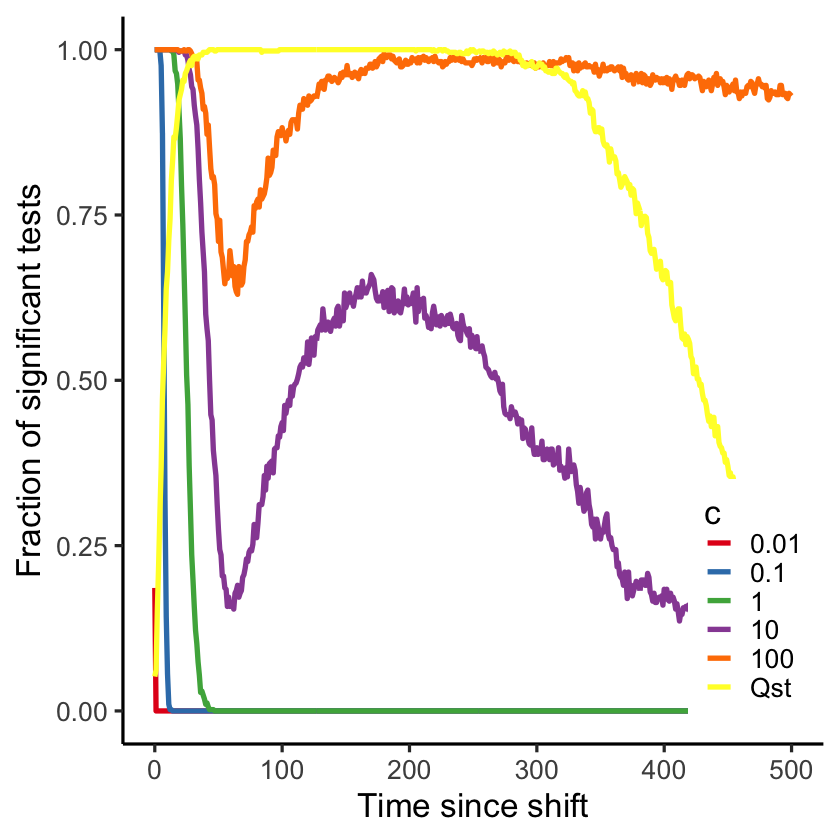

In [17]:
dat %>% 
    filter(env==-2) %>% 
    select(cycle,Zbar1,Zbar2,VP1,VP2,VG1,VG2,Qst,h2b,h2w,h21,h22,Fst) %>% 
    mutate(c = list(exp(seq(log(1e-2),log(100),len=5)))) %>%
    unnest(c) %>%
    rowwise() %>% 
    mutate(Pst = c*1/2*var(c(Zbar1,Zbar2))/(c*1/2*var(c(Zbar1,Zbar2))+(VP1+VP2))) %>%
    select(cycle,c,Qst,Pst,Fst) %>%
    pivot_longer(Qst:Pst,names_to="source",values_to="statistic") %>%
    mutate(c = ifelse(source=="Qst","Qst",c)) %>%
    mutate(T_LK = (2-1)/(Fst)*statistic) %>%
    mutate(p_LK = pchisq(T_LK,df=2-1,lower.tail=FALSE)) %>%
    group_by(c,cycle) %>% 
    summarise(positive_frac = mean(p_LK<0.05)) %>% 
    ggplot(aes(cycle-20000,positive_frac)) +
    geom_line(aes(color=c),size=1.5) +
    xlab("Time since split") +
    ylab("Fraction of significant tests") +
    theme_classic(base_size=20) +
    theme(legend.position=c(.9,.2),legend.spacing.y = unit(1,"pt")) +
    scale_color_brewer(palette="Set1",name="c") +
    scale_linetype(name="Environment and optimum") +
    xlab("Time since shift") +
    ylab("Fraction of significant tests") #+
    # ggtitle("Environment and optimum discordant")

ggsave("Figs/Qst_rate_different.pdf")

In [18]:
h2b = function(dg,de) {
    dg^2/(dg+de)^2  
}

In [19]:
dg = c(-10,-5,-2,2,5,10)
de = seq(-10,10,.01)
h2b_mat = matrix(nrow=length(dg),ncol=length(de))
for (i in 1:length(dg)) {
    for (j in 1:length(de)) {
        h2b_mat[i,j] = h2b(dg[i],de[j])
    }
}

In [20]:
h2b_tibble = as_tibble(h2b_mat)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


In [21]:
colnames(h2b_tibble) = de


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  de = col_double()
)

Saving 7 x 7 in image


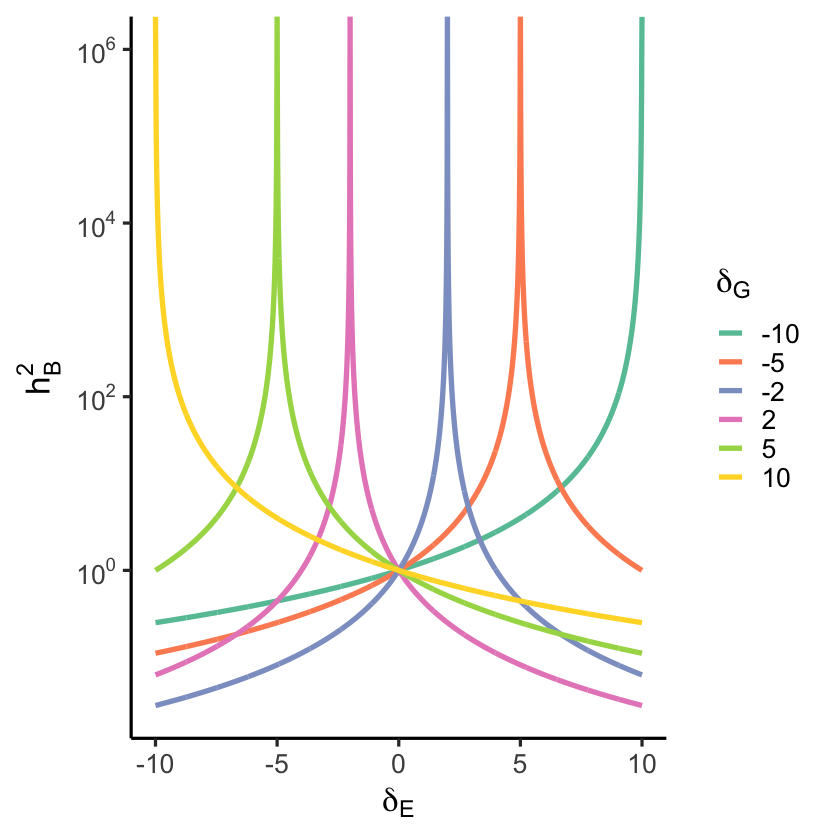

In [22]:
#MAKE FIGURE 1A

bind_cols(tibble(dg = dg),h2b_tibble) %>%
    pivot_longer(2:ncol(.),names_to="de",values_to="h2b") %>%
    type_convert() %>%
    ggplot(aes(de,h2b)) +
    geom_line(aes(color=as.factor(dg)),size=1.5) + 
    labs(color=expression(delta[G])) + 
    scale_y_log10(expression(h[B]^2),labels=label_log()) +
    scale_x_continuous(expression(delta[E])) +
    theme_classic(base_size=20) +
    scale_color_brewer(palette="Set2")
    

ggsave("Figs/h2b.pdf")